# Desafío - Árboles de Regresión

## Ejercicio 1: Preparación del ambiente de trabajo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import warnings

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (20,20)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns = 'Unnamed: 0')
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


## Ejercicio 2: Feature engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
MS_SubClass           2930 non-null object
MS_Zoning             2930 non-null object
Lot_Frontage          2930 non-null int64
Lot_Area              2930 non-null int64
Street                2930 non-null object
Alley                 2930 non-null object
Lot_Shape             2930 non-null object
Land_Contour          2930 non-null object
Utilities             2930 non-null object
Lot_Config            2930 non-null object
Land_Slope            2930 non-null object
Neighborhood          2930 non-null object
Condition_1           2930 non-null object
Condition_2           2930 non-null object
Bldg_Type             2930 non-null object
House_Style           2930 non-null object
Overall_Qual          2930 non-null object
Overall_Cond          2930 non-null object
Year_Built            2930 non-null int64
Year_Remod_Add        2930 non-null int64
Roof_Style            2930 non-null o

In [4]:
for index , (colname,serie) in enumerate(df.iteritems()):
    if serie.dtype == 'object':
        df = pd.concat([df, pd.get_dummies(df[colname], drop_first=True, prefix=colname)], axis=1)
        df = df.drop(columns=[colname])


In [5]:
df.columns.values

array(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF',
       'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars',
       'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch',
       'Three_season_porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val',
       'Mo_Sold', 'Year_Sold', 'Sale_Price', 'Longitude', 'Latitude',
       'MS_SubClass_One_Story_1945_and_Older',
       'MS_SubClass_One_Story_1946_and_Newer_All_Styles',
       'MS_SubClass_One_Story_PUD_1946_and_Newer',
       'MS_SubClass_One_Story_with_Finished_Attic_All_Ages',
       'MS_SubClass_One_and_Half_Story_Finished_All_Ages',
       'MS_SubClass_One_and_Half_Story_PUD_All_Ages',
       'MS_SubClass_One_and_Half_Story_Unfinished_All_Ages',
     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 307 entries, Lot_Frontage to Sale_Condition_Partial
dtypes: float64(2), int64(33), uint8(272)
memory usage: 1.5 MB


In [7]:
df.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0


## Ejercicio 3: Primer modelo

In [8]:
X = df.drop(columns = 'Sale_Price', axis=1)
y = df['Sale_Price']

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=.33, random_state=11238)

In [10]:
dec_tree = DecisionTreeRegressor().fit(X_train,y_train)

In [11]:
y_hat = dec_tree.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score
print("Test MSE: ", mean_squared_error(y_test,y_hat))
print("Test MAE: ", median_absolute_error(y_test,y_hat))
print("Test R2: ", r2_score(y_test,y_hat))

Test MSE:  1493284562.220269
Test MAE:  15750.0
Test R2:  0.7372588499056183


## Ejercicio 4: Importancia relativa

In [13]:
plt.rcParams['figure.figsize'] = (20,100)
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)
    return names

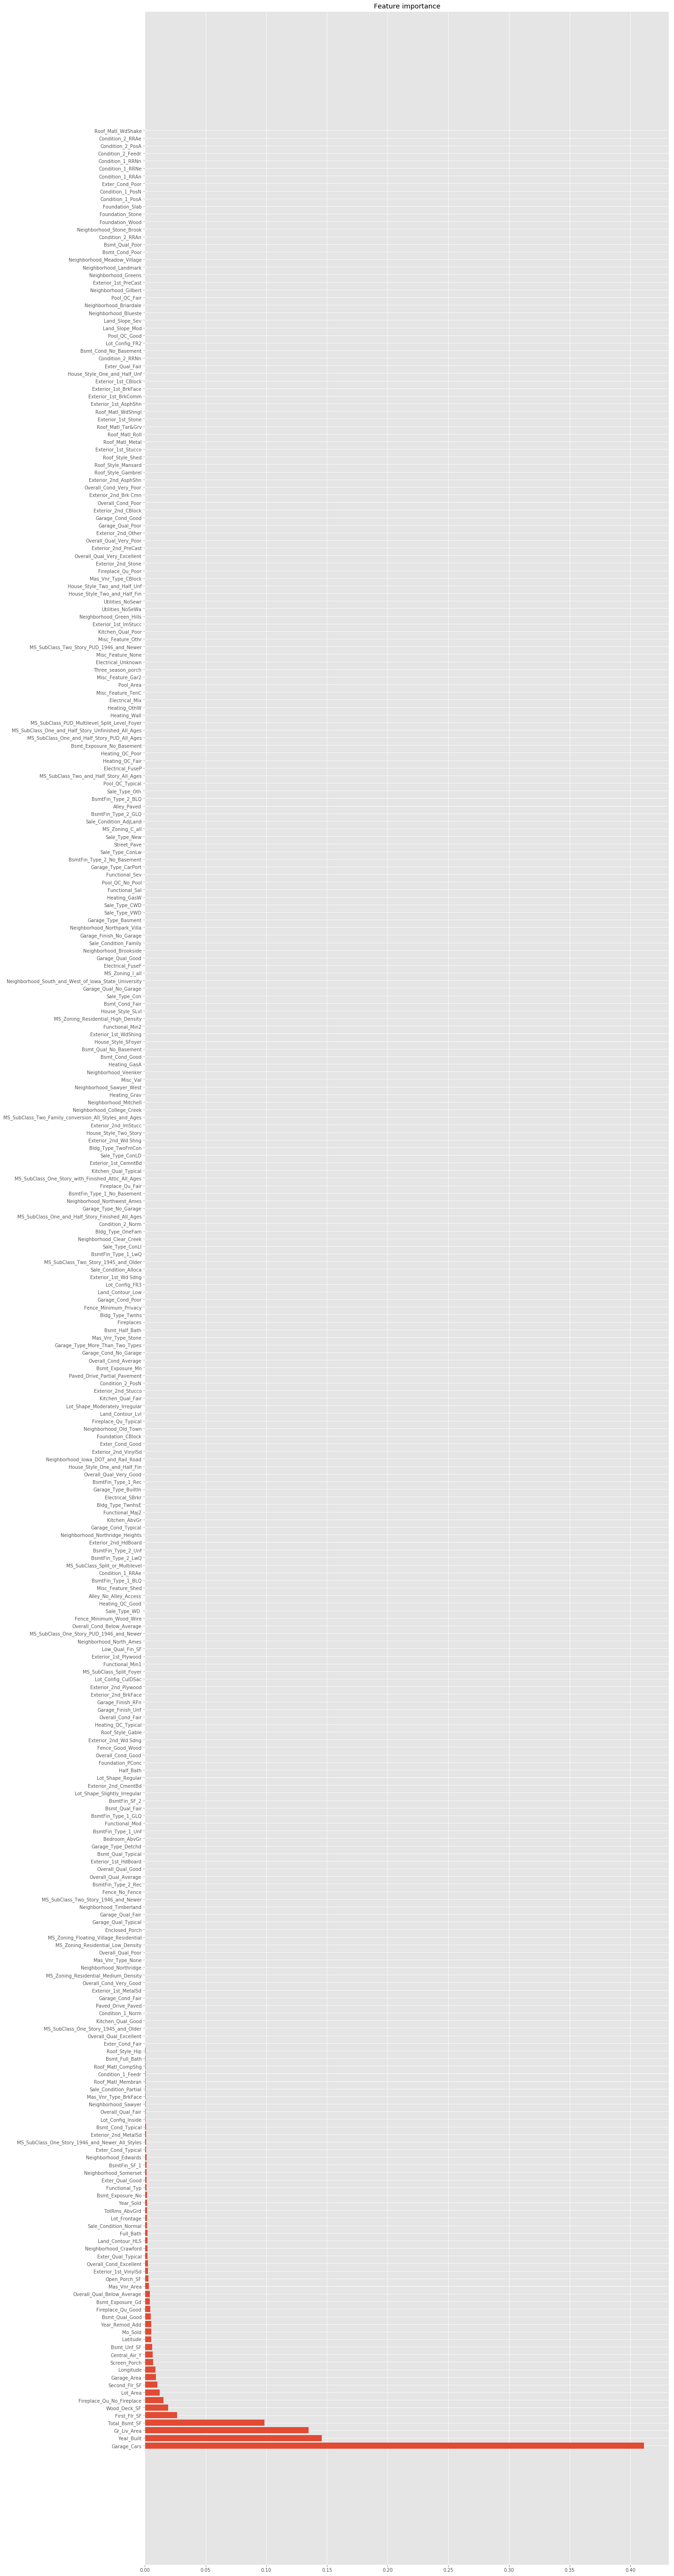

In [14]:
some = plot_importance(dec_tree, X.columns)

In [15]:
some[:10]

['Garage_Cars',
 'Year_Built',
 'Gr_Liv_Area',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Wood_Deck_SF',
 'Fireplace_Qu_No_Fireplace',
 'Lot_Area',
 'Second_Flr_SF',
 'Garage_Area']

In [16]:
X_top = df.loc[:,['Garage_Cars','Year_Built','Gr_Liv_Area','Total_Bsmt_SF','First_Flr_SF','Wood_Deck_SF','Fireplace_Qu_No_Fireplace','Second_Flr_SF','Garage_Area','Lot_Area']]

## Ejercicio 5: Refactorización del modelo y pickling

In [17]:
X_train , X_test, y_train , y_test = train_test_split(X_top, y, test_size=.33, random_state=11238)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [19]:
dec_tree_grid_cv = GridSearchCV(DecisionTreeRegressor(),
                               {'max_depth': np.linspace(1,32,32),
                               'min_samples_leaf': np.linspace(0.1,0.5,10),
                               'max_features': list(range(1,X_train.shape[1]))},
                               cv=5).fit(X_train,y_train)

In [20]:
dec_tree_grid_cv.best_params_

{'max_depth': 27.0, 'max_features': 6, 'min_samples_leaf': 0.1}

In [21]:
dec_tree_grid_cv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=27.0, max_features=6,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [22]:
y_hat = dec_tree_grid_cv.best_estimator_.predict(X_test)

In [23]:
print("Test MSE: ", mean_squared_error(y_test,y_hat))
print("Test MAE: ", median_absolute_error(y_test,y_hat))
print("Test R2: ", r2_score(y_test,y_hat))

Test MSE:  2738378070.901762
Test MAE:  23138.918660287076
Test R2:  0.5181865386244883


In [24]:
import pickle

In [27]:
pickle.dump(dec_tree_grid_cv, open('felipe-veloso-actividad07.sav',
'wb'))
pickle.dump(X_train, open('felipe-veloso-actividad07_x_train.sav',
'wb'))
pickle.dump(X_test, open('felipe-veloso-actividad07_x_test.sav',
'wb'))
pickle.dump(y_train, open('felipe-veloso-actividad07_y_train.sav',
'wb'))
pickle.dump(y_test, open('felipe-veloso-actividad07_y_test.sav',
'wb'))
